# Iris Dataset Analysis

#### Importing libraries

In [25]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')

#### Loading iris dataset

In [20]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target
col_names = ['Sepal_length', 'Sepal_width', 'Petal_length','Petal_width']

#Creating a dataframe
df_iris = pd.DataFrame(X)
df_iris.columns = col_names

#Target values and corresponding iris type : 0 --- Setosa : 1 --- Versicolor : 2 --- Virginica
df_iris['Iris-type'] = Y

#Printing the Statistical analysis of features of Iris flowers 
print(df_iris.describe())


       Sepal_length  Sepal_width  Petal_length  Petal_width   Iris-type
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


#### Exploratory Data Analysis

<Figure size 864x576 with 0 Axes>

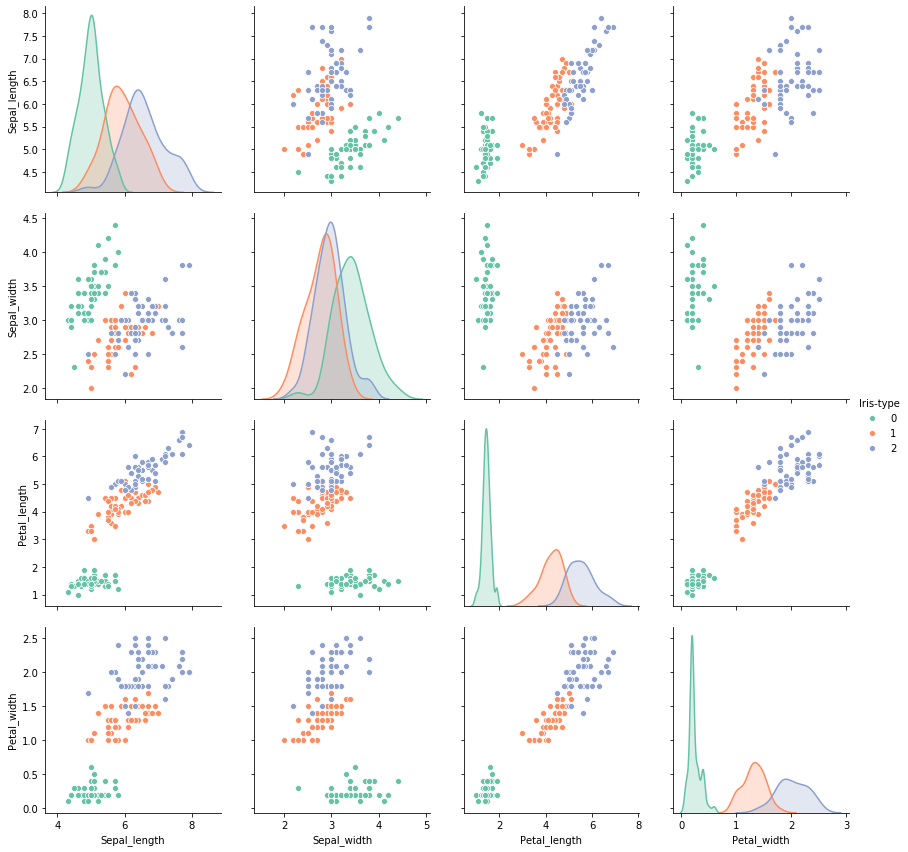

In [34]:
plt.figure(2, figsize=(12, 8))
g = sns.pairplot(df_iris, height = 3, hue='Iris-type', markers='o', vars=["Sepal_length", "Sepal_width", 'Petal_length', 'Petal_width'])
plt.show()

#### Inference

1.As can be seen there definitely is an overlap between the three types of iris flowers in terms of their Sepal length, width and also for two of the species there is an overlap on the basis of their petal length and width.

3.We will first implement a baseline classification model using logistic regression. 

3.As observed classification based on Sepal width is going to be tough since there is an overlap between different species. Hence, we will use all the features except Sepal width for classification problem after the baseline model is evaluated to check if the accuracy improves.


#### Checking the correlation between features

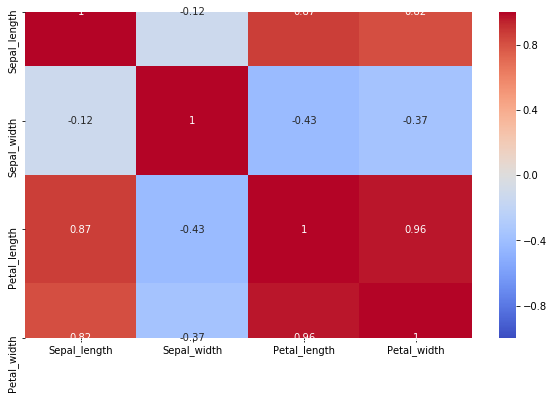

In [62]:
plt.figure(figsize=(10,6))
df_irisx = df_iris.drop('Iris-type', axis=1)
sns.heatmap(df_irisx.corr(),annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

#### Implementing Logistic regression 
Classification problem of the Iris species based on the 4 features Sepal and Petal length, width.

In [64]:
from sklearn.model_selection import train_test_split
# library for Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression  
# library for checking the model accuracy
from sklearn import metrics 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

logR = LogisticRegression()
logR.fit(X_train,Y_train)
logR_pred = logR.predict(X_test)
logR_acc = metrics.accuracy_score(logR_pred,Y_test)
print('The accuracy of the Logistic Regression is', logR_acc)


The accuracy of the Logistic Regression is 0.8888888888888888


C:\Users\Prashita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Prashita\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [65]:
#for using Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier 

rand_clf = RandomForestClassifier(n_estimators=20, max_depth=2)
rand_clf.fit(X_train, Y_train)
rand_pred = rand_clf.predict(X_test)
rand_acc = metrics.accuracy_score(rand_pred, Y_test)
print('The accuracy of the Random forest classifier is', rand_acc)


The accuracy of the Random forest classifier is 0.9777777777777777


In [66]:
#for Support Vector Machine Algorithm
from sklearn import svm  

sv = svm.SVC() #select the algorithm
sv.fit(X_train,Y_train) # we train the algorithm with the training data and the training output
svm_pred = sv.predict(X_test) #now we pass the testing data to the trained algorithm
svm_acc = metrics.accuracy_score(svm_pred,Y_test)

print('The accuracy of the SVM classifier is:', svm_acc)


The accuracy of the SVM classifier is: 1.0


C:\Users\Prashita\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [67]:
# for K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
knn.fit(X_train,Y_train)
knn_pred = knn.predict(X_test)
knn_acc = metrics.accuracy_score(knn_pred, Y_test)

print('The accuracy of the KNN is', knn_acc)

The accuracy of the KNN is 0.9777777777777777


### Summarizing our results : Sorted by the best models by accuracy evaluated above

In [68]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Tree', 'Support Vector Machines',
              'K-Nearest Neighbours'],
    'Score': [logR_acc, rand_acc, svm_acc, knn_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Machines,1.000000
1,Random Forest Tree,0.977778
3,K-Nearest Neighbours,0.977778
0,Logistic Regression,0.888889
